In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:

from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor

In [3]:
testdata=pd.read_csv(r"C:\Users\My PC\Downloads\test-data.csv")
traindata=pd.read_csv(r"C:\Users\My PC\Downloads\train-data.csv")
testdata

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [4]:
traindata.isnull().sum()


Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [5]:
traindata=traindata.drop("New_Price",axis=1)
testdata=testdata.drop("New_Price",axis=1)
traindata = traindata.drop('Unnamed: 0', axis=1)
testdata = testdata.drop('Unnamed: 0', axis=1)

In [6]:
traindata=traindata.dropna(how="any")
testdata=testdata.dropna(how="any")

In [7]:
#finding the differenc'e between in the models data
traincar=traindata["Name"]
testcar=testdata["Name"]
data=set(testcar).difference(traincar)
data

{'Audi Q3 30 TDI S Edition',
 'Audi Q5 2008-2012 3.0 TDI Quattro',
 'BMW 3 Series GT 320d Sport Line',
 'BMW 5 Series 530i Sport Line',
 'BMW 7 Series 730Ld DPE Signature',
 'BMW 7 Series 740i Sedan',
 'BMW X3 2.5si',
 'Bentley Flying Spur W12',
 'Chevrolet Enjoy 1.3 TCDi LTZ 7',
 'Chevrolet Enjoy 1.4 LTZ 8',
 'Chevrolet Enjoy Petrol LTZ 7 Seater',
 'Chevrolet Enjoy TCDi LS 7 Seater',
 'Chevrolet Sail Hatchback 1.2',
 'Chevrolet Spark 1.0 PS',
 'Datsun GO T Petrol',
 'Fiat Abarth 595 Competizione',
 'Fiat Avventura FIRE Dynamic',
 'Fiat Avventura Urban Cross 1.3 Multijet Emotion',
 'Fiat Grande Punto 1.2 Emotion',
 'Fiat Linea Classic 1.3 Multijet',
 'Fiat Linea Dynamic',
 'Fiat Punto EVO 1.3 Emotion',
 'Ford Classic 1.4 Duratorq CLXI',
 'Ford EcoSport 1.5 Petrol Ambiente',
 'Ford Endeavour 3.0L AT 4x2',
 'Ford Fiesta 1.4 SXI Duratorq',
 'Ford Fiesta Classic 1.6 Duratec LXI',
 'Ford Fiesta Classic 1.6 SXI Duratec',
 'Ford Freestyle Titanium Plus Diesel',
 'Ford Ikon 1.4 ZXi',
 'Hindust

In [8]:
#DATA


In [9]:
#adding new column named carname with name and model
traindata['carmodel'] = traindata['Name'].str.split(" ").str[0] + ' ' +traindata['Name'].str.split(" ").str[1]
testdata['carmodel'] = testdata['Name'].str.split(" ").str[0] + ' ' +testdata['Name'].str.split(" ").str[1]

In [10]:
#finding the differenc'e between in the models data
traincar=traindata["carmodel"]
testcar=testdata["carmodel"]
data=list(set(testcar).difference(traincar))
traindata["carmodel"].unique()

array(['Maruti Wagon', 'Hyundai Creta', 'Honda Jazz', 'Maruti Ertiga',
       'Audi A4', 'Hyundai EON', 'Nissan Micra', 'Toyota Innova',
       'Volkswagen Vento', 'Tata Indica', 'Maruti Ciaz', 'Honda City',
       'Maruti Swift', 'Land Rover', 'Mitsubishi Pajero', 'Honda Amaze',
       'Renault Duster', 'Mercedes-Benz New', 'BMW 3', 'Maruti S',
       'Audi A6', 'Hyundai i20', 'Maruti Alto', 'Honda WRV',
       'Toyota Corolla', 'Mahindra Ssangyong', 'Maruti Vitara',
       'Mahindra KUV', 'Mercedes-Benz M-Class', 'Volkswagen Polo',
       'Tata Nano', 'Hyundai Elantra', 'Hyundai Xcent', 'Mahindra Thar',
       'Hyundai Grand', 'Renault KWID', 'Hyundai i10', 'Nissan X-Trail',
       'Maruti Zen', 'Ford Figo', 'Mercedes-Benz C-Class',
       'Porsche Cayenne', 'Mahindra XUV500', 'Nissan Terrano',
       'Honda Brio', 'Ford Fiesta', 'Hyundai Santro', 'Tata Zest',
       'Maruti Ritz', 'BMW 5', 'Toyota Fortuner', 'Ford Ecosport',
       'Hyundai Verna', 'Datsun GO', 'Maruti Omni', 'Toyot

In [11]:
#now we need to drop these from testdata using index drop
testdata.drop(testdata[testdata["carmodel"].isin(data)].index,inplace=True)
traindata

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,carmodel
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,Maruti Swift
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,Hyundai Xcent
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,Mahindra Xylo
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,Maruti Wagon


In [12]:
#finding the differenc'e between in the models data   for confirming that no model exist in teseting data that are not trained
traincar=traindata["carmodel"]
testcar=testdata["carmodel"]
data=set(testcar).difference(traincar)
data

set()

In [13]:
# we have milage ,power etc in term of untis so we need to modeify them

In [14]:
#traindata tranformation to numerical value
traindata["Mileage"]=traindata["Mileage"].str.replace("kmpl",'')
traindata["Mileage"]=traindata["Mileage"].str.replace("km/kg",'')
traindata["Engine"]=traindata["Engine"].str.replace("CC",'')
traindata["Power"]=traindata["Power"].str.replace("bhp",'')
traindata['Power']=traindata['Power'].str.replace('null bhp','112')
traindata['Power']=traindata['Power'].str.replace('null','112')
#testing data tranformation
testdata["Mileage"]=testdata["Mileage"].str.replace("kmpl",'')
testdata["Mileage"]=testdata["Mileage"].str.replace("km/kg",'')
testdata["Engine"]=testdata["Engine"].str.replace("CC",'')
testdata["Power"]=testdata["Power"].str.replace("bhp",'')
testdata['Power']=testdata['Power'].str.replace('null bhp','112')
testdata['Power']=testdata['Power'].str.replace('null','112')

In [15]:
#traindata tranformation to numerical value
traindata["Mileage"]=traindata["Mileage"].str.strip()
traindata["Mileage"]=traindata["Mileage"].str.strip()
traindata["Engine"]=traindata["Engine"].str.strip()
traindata["Power"]=traindata["Power"].str.strip()
#testing data tranformation
testdata["Mileage"]=testdata["Mileage"].str.strip()
testdata["Mileage"]=testdata["Mileage"].str.strip()
testdata["Engine"]=testdata["Engine"].str.strip()
testdata["Power"]=testdata["Power"].str.strip()
testdata['Power']=testdata['Power'].str.strip()

#converting to num datatype
traindata['Mileage'] = traindata['Mileage'].astype(float)
traindata['Mileage'] = traindata['Mileage'].astype(float)
traindata['Engine'] = traindata['Engine'].astype(float)
traindata['Power'] = traindata['Power'].astype(float)

testdata['Mileage'] = testdata['Mileage'].astype(float)
testdata['Mileage'] = testdata['Mileage'].astype(float)
testdata['Engine'] = testdata['Engine'].astype(float)
testdata['Power'] = testdata['Power'].astype(float)

In [16]:
feature =['carmodel', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
           'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']
data = pd.DataFrame(traindata, columns=feature)
feature1 = ['carmodel', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
test = pd.DataFrame(testdata, columns=feature1)
data

,carmodel,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [17]:
# EDA VISUAL ANALYSIS

In [18]:
data.head(10)

,carmodel,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
5,Hyundai EON,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35
6,Nissan Micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,Toyota Innova,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50
8,Volkswagen Vento,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.20
9,Tata Indica,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,1.95


Skewness: 3.334741
Kurtosis: 17.073183


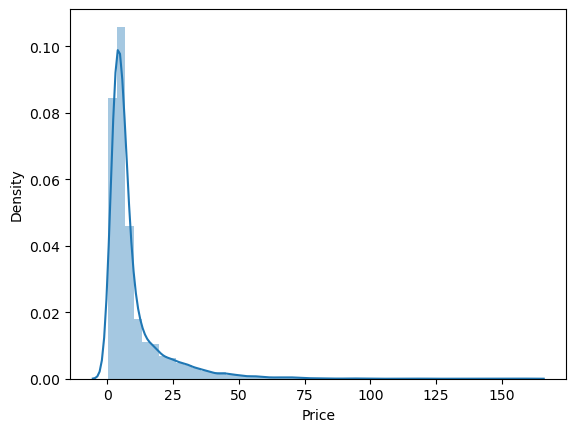

In [19]:

sns.distplot(data['Price'])
print("Skewness: %f" % data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())

Skewness: 0.420037
Kurtosis: 0.183272


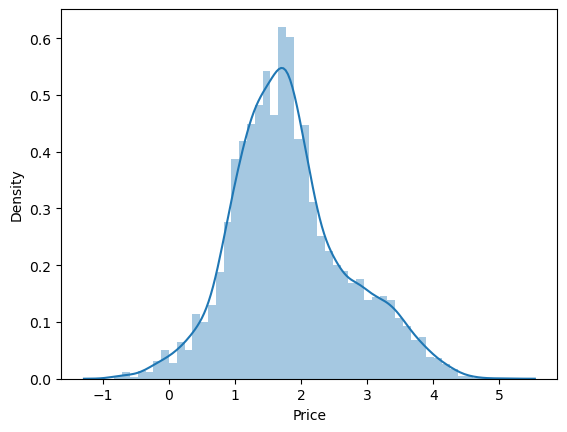

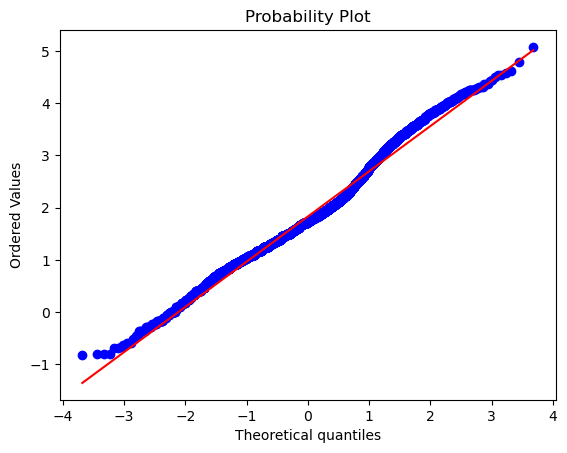

In [20]:
#applying log transformation
data['Price'] = np.log(data['Price'])
#transformed histogram and normal probability plot
#sns.distplot(data['Price']);
sns.distplot(data['Price'], fit=None);
print("Skewness: %f" % data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())
fig = plt.figure()
res = stats.probplot(data['Price'], plot=plt)

In [21]:
data.head(3)

,carmodel,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,0.559616
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.525729
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,1.504077


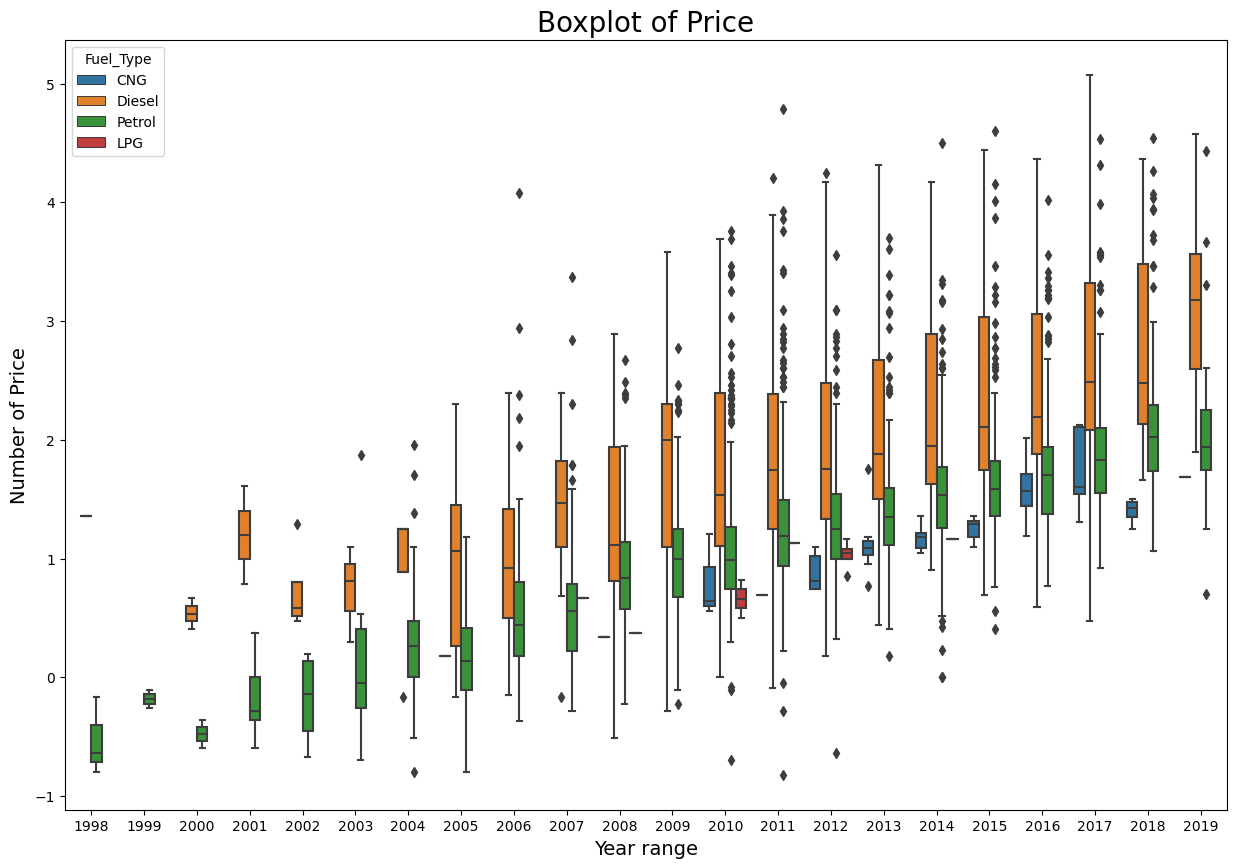

In [22]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=data, x=xprop, y=yprop, hue='Fuel_Type')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()


In [23]:
#RELATIONSHIP OF PRICE WITH OTHER PARAMETER

In [25]:
# # Find most important features relative to target Price
# print("Find most important features relative to Price-target")
# corr = data.corr()
# corr.sort_values(["Price"], ascending = False, inplace = True)
# print(corr.Price)

In [26]:
px.treemap(data.groupby(by='Fuel_Type').sum().reset_index(), path=['Fuel_Type'], labels='Fuel_Type',
           values='Price', title='Price vs Fuel_type')

In [27]:
yprop = 'Price'
xprop = 'Power'
h= 'Fuel_Type'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

In [28]:
#transmission vs price
yprop = 'Price'
xprop = 'Engine'
h= 'Transmission'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

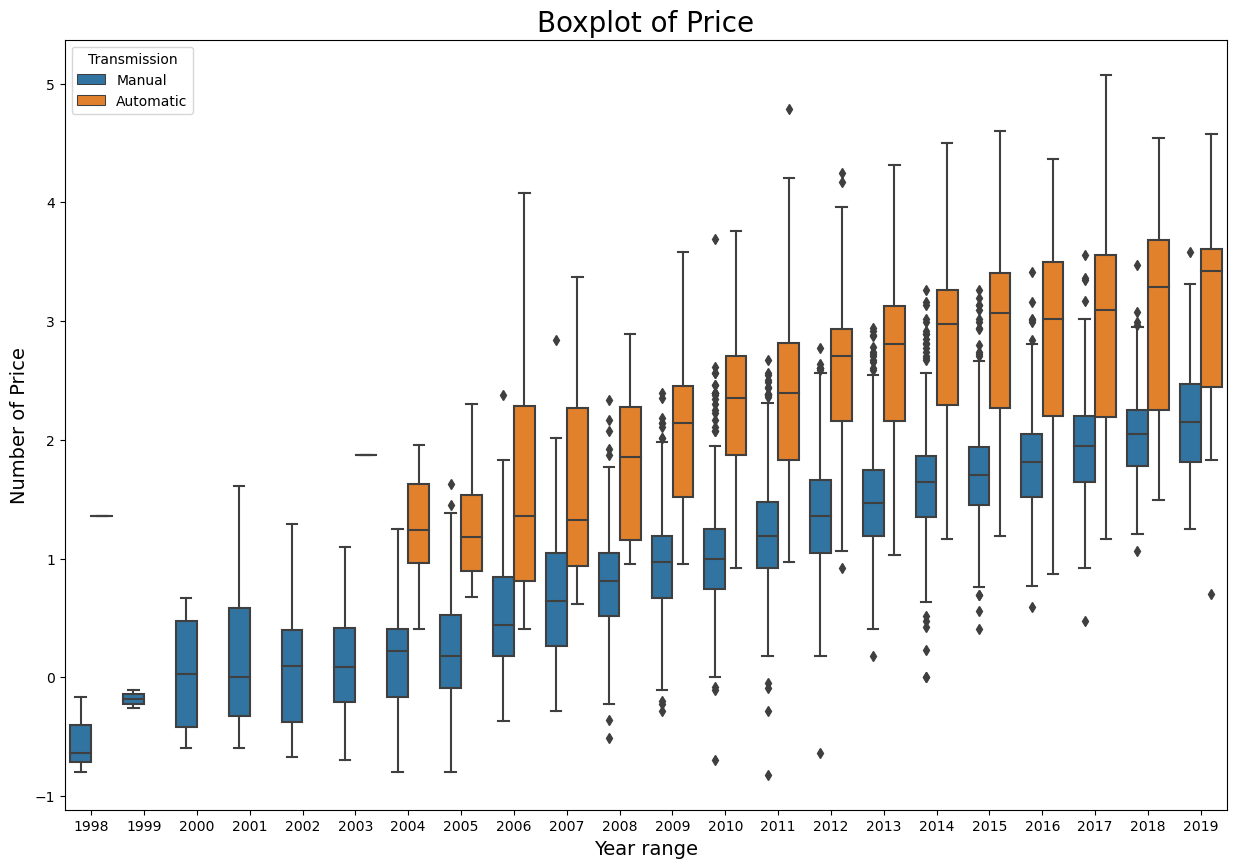

In [29]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=data, x=xprop, y=yprop, hue='Transmission')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()


In [30]:
yprop = 'Price'
xprop = 'Year'
h= 'Owner_Type'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")
#fig.update_layout(xaxis_range=[0,5e5])

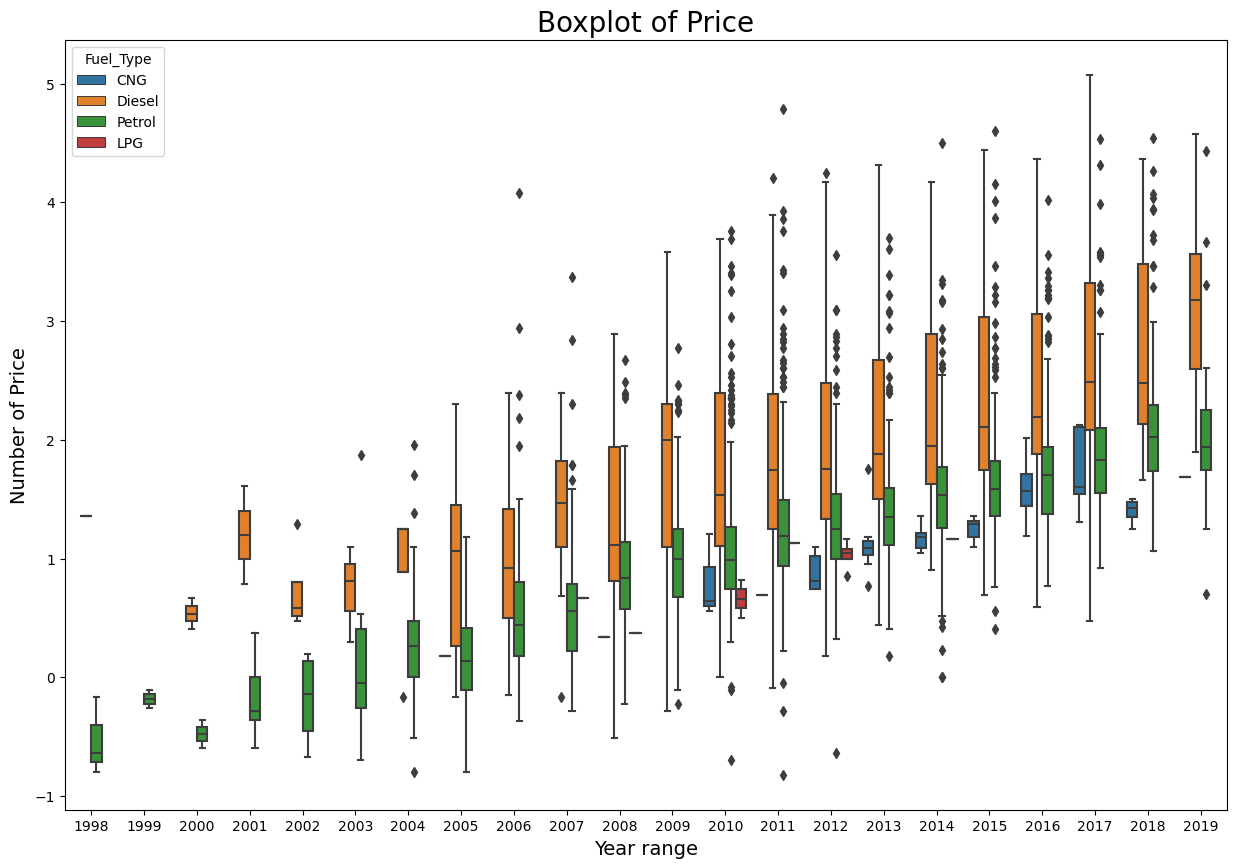

In [31]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=data, x=xprop, y=yprop, hue='Fuel_Type')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

In [32]:
fig = px.box(data, x='Fuel_Type',y='Price', color='Transmission', notched=True)
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

In [33]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=data['Fuel_Type'], values=data['Price'], hole=.3)])
fig.update_layout(legend=dict(orientation="h", yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

In [34]:
#MODEL TRAINIG

In [35]:
#encoding the all data
database=[]
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
column=["carmodel","Location","Fuel_Type","Transmission","Owner_Type"]
for i in column:
  encodeddata=data[i]
  data[i]=label_encoder.fit_transform(data[i])
  test[i]=label_encoder.fit_transform(test[i])
  label_maps=dict(zip(encodeddata,data[i]))
  database.append(label_maps)
database

[{'Maruti Wagon': 124,
  'Hyundai Creta': 65,
  'Honda Jazz': 60,
  'Maruti Ertiga': 112,
  'Audi A4': 2,
  'Hyundai EON': 66,
  'Nissan Micra': 154,
  'Toyota Innova': 197,
  'Volkswagen Vento': 207,
  'Tata Indica': 180,
  'Maruti Ciaz': 109,
  'Honda City': 58,
  'Maruti Swift': 121,
  'Land Rover': 87,
  'Mitsubishi Pajero': 152,
  'Honda Amaze': 53,
  'Renault Duster': 164,
  'Mercedes-Benz New': 138,
  'BMW 3': 12,
  'Maruti S': 118,
  'Audi A6': 3,
  'Hyundai i20': 78,
  'Maruti Alto': 106,
  'Honda WRV': 63,
  'Toyota Corolla': 194,
  'Mahindra Ssangyong': 96,
  'Maruti Vitara': 123,
  'Mahindra KUV': 90,
  'Mercedes-Benz M-Class': 137,
  'Volkswagen Polo': 205,
  'Tata Nano': 183,
  'Hyundai Elantra': 67,
  'Hyundai Xcent': 76,
  'Mahindra Thar': 98,
  'Hyundai Grand': 70,
  'Renault KWID': 166,
  'Hyundai i10': 77,
  'Nissan X-Trail': 158,
  'Maruti Zen': 125,
  'Ford Figo': 47,
  'Mercedes-Benz C-Class': 128,
  'Porsche Cayenne': 160,
  'Mahindra XUV500': 101,
  'Nissan Terr

In [36]:
train=['carmodel', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type','Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats',]
X=data[train]
y=data["Price"]

USEING DIFFERENT MODELS TO EVALUATE THE OUTCOME

In [37]:
import pandas as pd
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Testing set'])
Acc

,model,Root Mean Squared Error,Accuracy on Testing set


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()],
              ['GradientBoostingRegressor',GradientBoostingRegressor()]]

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score
for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)
    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Testing set':ATeS}),ignore_index=True )

AttributeError: 'DataFrame' object has no attribute 'append'

In [43]:
Acc.sort_values(by='Accuracy on Testing set',ignore_index=True)

,model,Root Mean Squared Error,Accuracy on Testing set


In [44]:
a=data.head().drop("Price",axis=1)
data.head()

,carmodel,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,124,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,0.559616
1,65,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,2.525729
2,60,2,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,1.504077
3,112,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,1.791759
4,2,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,2.875822


In [45]:
model= XGBRegressor(random_state=21, n_estimators=5000)
feature1 = ['carmodel', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
X0 = test[feature1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
model.fit(X_train,y_train)
y_predicted = model.predict(a)

submission = pd.DataFrame({'Car_id':a.index,'Price':np.exp(y_predicted)})
submission.head()

,Car_id,Price
0,0,1.748551
1,1,12.396379
2,2,3.712604
3,3,5.982234
4,4,15.009532


In [46]:
gboost= GradientBoostingRegressor(random_state=21, n_estimators=5000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
gboost.fit(X_train,y_train)
y_predicted = gboost.predict(a)
submission5= pd.DataFrame({'Car_id':a.index,'Price':np.exp(y_predicted)})
submission5.head()


,Car_id,Price
0,0,1.698586
1,1,11.854864
2,2,3.390037
3,3,5.637136
4,4,15.902198


In [47]:
import pickle
pickle.dump(gboost,open('gboost.pkl','wb'))


In [48]:
etree= ExtraTreesRegressor(random_state=21, n_estimators=5000)
feature1 = ['carmodel', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
X0 = test[feature1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
etree.fit(X_train,y_train)
y_predicted = etree.predict(a)

submission = pd.DataFrame({'Car_id':a.index,'Price':np.exp(y_predicted)})
submission.head()

,Car_id,Price
0,0,1.750000
1,1,12.500000
2,2,3.252646
3,3,6.000000
4,4,14.592690


In [53]:

randomforest= RandomForestRegressor(random_state=21, n_estimators=5000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
randomforest.fit(X_train,y_train)
y_predicted = randomforest.predict(a)
submission2= pd.DataFrame({'Car_id':a.index,'Price':np.exp(y_predicted)})
submission2.head()


,Car_id,Price
0,0,1.695307
1,1,11.646910
2,2,3.158493
3,3,5.905877
4,4,13.270970


In [51]:
import pickle
pickle.dump(model,open('xgboost.pkl','wb'))

In [59]:
pickle.dump(randomforest,open('randomforest.pkl','wb'))

In [58]:
pickle.dump(etree,open("extratree.pkl","wb"))

In [60]:
model2=pickle.load(open('xgboost.pkl','rb'))

In [63]:
model3=pickle.load(open('randomforest.pkl','rb'))

In [64]:

results=model3.predict(a)
for i in results:
  i=np.exp(i)
  print(i)

1.6953073424471248
11.646909723673664
3.1584929153897283
5.905876859059477
13.270970353880317
